In [99]:
# Import pandas
import pandas as pd
from tabulate import tabulate

In [100]:
# Load in the listings data
df = pd.read_csv('data/listings.csv')
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,14,1,2014-01-02,0.01,1,295
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,2,473,2020-03-15,3.44,1,340


####  Exercise 1: Create a bar chart and dataframe of top 10 Neigborhoods that have the most expensive listsings on average. 
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

In [101]:
#Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods. This is a little dubious - we assign "expensive" by 
#calculating the average cost of an AirBnB in each neighborhood.

In [102]:
# Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighborhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a data frame that sorts the neighborhood field by descending price.  
# Use head to cut back to the top 10. Then, use df.plot.barh to generate a histogram.

In [103]:
# Now, display the top 10 data frame you created as a table with columns
# neighbourhood and price

In [104]:
#Getting general information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46527 entries, 0 to 46526
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              46527 non-null  int64  
 1   name                            46509 non-null  object 
 2   host_id                         46527 non-null  int64  
 3   host_name                       46492 non-null  object 
 4   neighbourhood_group             46527 non-null  object 
 5   neighbourhood                   46527 non-null  object 
 6   latitude                        46527 non-null  float64
 7   longitude                       46527 non-null  float64
 8   room_type                       46527 non-null  object 
 9   price                           46527 non-null  int64  
 10  minimum_nights                  46527 non-null  int64  
 11  number_of_reviews               46527 non-null  int64  
 12  last_review                     

In [105]:
#Get the columns that I need
df_listings = df[['id', 'name', 'host_id','neighbourhood_group', 'neighbourhood', 'price']]
df_listings.head()

,id,name,host_id,neighbourhood_group,neighbourhood,price
0,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,175
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,Brooklyn,Clinton Hill,75
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,60
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,175
4,5178,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,65


In [113]:
#Checking how many of each neighbourhood we have
df_listings['neighbourhood'].value_counts()

neighbourhood
Williamsburg                  3486
Bedford-Stuyvesant            3438
Harlem                        2503
Bushwick                      2225
Hell's Kitchen                1858
                              ... 
Huguenot                         1
Willowbrook                      1
Gerritsen Beach                  1
Bay Terrace, Staten Island       1
Rossville                        1
Name: count, Length: 222, dtype: int64

In [114]:
#Sorting all of the listings by their price from highest to lowest
df_listings_in_price_descending_order = df_listings.sort_values(by='price', ascending=False)
df_listings_in_price_descending_order.head(10)

,id,name,host_id,neighbourhood_group,neighbourhood,price
38738,39574087,"The Allen Hotel, Deluxe Penthouse King Suite",266741420,Manhattan,Lower East Side,10000
14718,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Brooklyn,Greenpoint,10000
38075,39100961,"Chambers Hotel, Chambers Hotel Queen - ADA",220229838,Manhattan,Midtown,10000
14763,13925864,Puerto Plata,58480311,Queens,Long Island City,10000
31004,31219800,~New jersey loft,172226912,Manhattan,Murray Hill,10000
36031,37059577,"Celebrity building, panoramic/uninterrupted views",278736146,Manhattan,Hell's Kitchen,10000
23652,22436899,1-BR Lincoln Center,72390391,Manhattan,Upper West Side,10000
27091,26986636,Two Bedroom Suite,176952168,Manhattan,Financial District,9999
27979,28132224,Standard Double at AKA Tribeca,212484716,Manhattan,Midtown,9999
27093,26987123,Studio Premium Suite,176952168,Manhattan,Financial District,9999


In [120]:
#Grouping the neighbourhoods by their average prices in descending order and grabbing top 10
average_price_of_neighbourhoods = df_listings.groupby('neighbourhood')['price'].mean()
average_price_of_neighbourhoods_most_expensive = average_price_of_neighbourhoods.sort_values(ascending=False).head(10)
average_price_of_neighbourhoods_most_expensive

neighbourhood
Fort Wadsworth        800.000000
Woodrow               700.000000
Sea Gate              418.230769
Tribeca               381.107143
Flatiron District     367.415584
Briarwood             366.162162
Financial District    335.385057
Willowbrook           309.000000
Tottenville           309.000000
Prince's Bay          300.000000
Name: price, dtype: float64

Text(0, 0.5, 'Neighbourhoods of AirBNB')

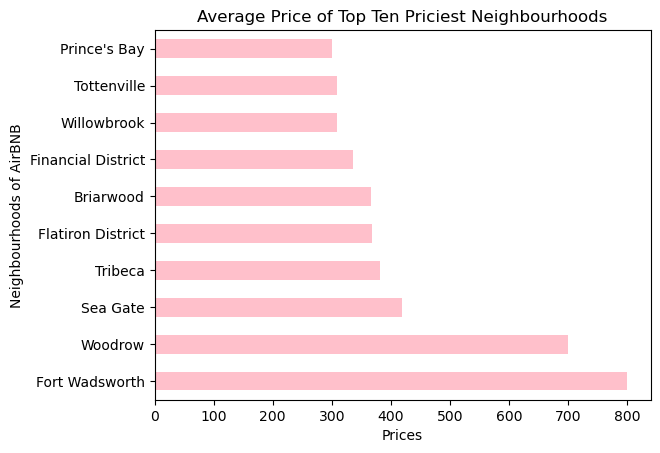

In [122]:
# Creating a horizontal barplot from Series
graph = average_price_of_neighbourhoods_most_expensive.plot(kind='barh', color='pink', title='Average Price of Top Ten Priciest Neighbourhoods')

# Adding labels
graph.set_xlabel('Prices')
graph.set_ylabel('Neighbourhoods of AirBNB')

In [152]:
# Convert Series to DataFrame
df_average_price_of_neighbourhoods_most_expensive = pd.DataFrame(average_price_of_neighbourhoods_most_expensive)

# Reset the index
df_average_price_of_neighbourhoods_most_expensive = df_average_price_of_neighbourhoods_most_expensive.reset_index()

# Make and display the table
table = tabulate(df_average_price_of_neighbourhoods_most_expensive, headers='keys', tablefmt='pretty')
print(table)

+---+--------------------+--------------------+
|   |   neighbourhood    |       price        |
+---+--------------------+--------------------+
| 0 |   Fort Wadsworth   |       800.0        |
| 1 |      Woodrow       |       700.0        |
| 2 |      Sea Gate      | 418.2307692307692  |
| 3 |      Tribeca       | 381.10714285714283 |
| 4 | Flatiron District  | 367.4155844155844  |
| 5 |     Briarwood      | 366.1621621621622  |
| 6 | Financial District | 335.38505747126436 |
| 7 |    Willowbrook     |       309.0        |
| 8 |    Tottenville     |       309.0        |
| 9 |    Prince's Bay    |       300.0        |
+---+--------------------+--------------------+


####  Exercise 2: Create a bar chart and dataframe of top 10 Neigborhoods that have the LEAST expensive listsings on average. 

Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Bew wure to provide a pivot table.

In [110]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.

In [111]:
# we also would like to have the corresponding pivot table of the lowest 10

In [116]:
df_listings_in_ascending_order = df_listings.sort_values(by='price', ascending=True)
df_listings_in_ascending_order

,id,name,host_id,neighbourhood_group,neighbourhood,price
42224,42065555,Pod Hotel BK,309714886,Brooklyn,Williamsburg,0
42225,42065564,The Wall Street Inn,314151200,Manhattan,Financial District,0
43798,43078551,SIXTY SoHo,341876038,Manhattan,SoHo,0
43799,43078552,SIXTY LES,342053968,Manhattan,Lower East Side,0
43800,43078557,Hotel Pennsylvania,333431518,Manhattan,Chelsea,0
...,...,...,...,...,...,...
38075,39100961,"Chambers Hotel, Chambers Hotel Queen - ADA",220229838,Manhattan,Midtown,10000
31004,31219800,~New jersey loft,172226912,Manhattan,Murray Hill,10000
23652,22436899,1-BR Lincoln Center,72390391,Manhattan,Upper West Side,10000
36031,37059577,"Celebrity building, panoramic/uninterrupted views",278736146,Manhattan,Hell's Kitchen,10000


In [121]:
# Convert Series to DataFrame
average_price_of_neighbourhoods = df_listings.groupby('neighbourhood')['price'].mean()


average_price_of_neighbourhoods_least_expensive = average_price_of_neighbourhoods.sort_values(ascending=True).head(10)
average_price_of_neighbourhoods_least_expensive

neighbourhood
South Beach                   45.000000
Bull's Head                   49.666667
Port Richmond                 51.222222
Soundview                     52.055556
New Brighton                  52.250000
Bay Terrace, Staten Island    55.000000
Hunts Point                   56.583333
University Heights            57.826087
Grant City                    58.400000
Olinville                     59.428571
Name: price, dtype: float64

Text(0, 0.5, 'Neighbourhoods of AirBNB')

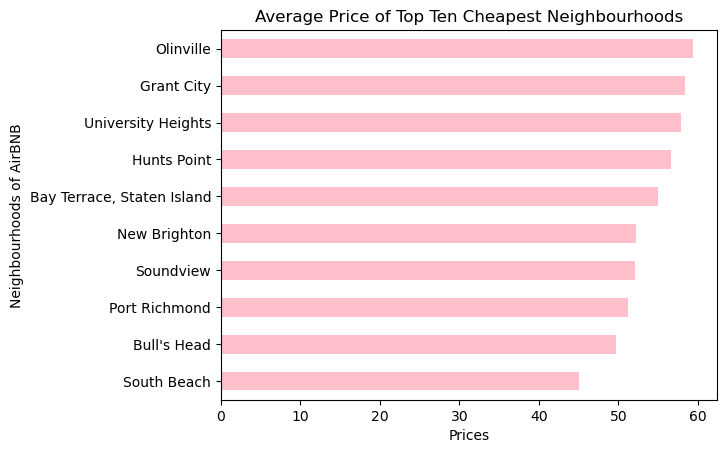

In [126]:
graph = average_price_of_neighbourhoods_least_expensive.plot(kind='barh',color='pink', title='Average Price of Top Ten Cheapest Neighbourhoods')

graph.set_xlabel('Prices')
graph.set_ylabel('Neighbourhoods of AirBNB')

In [149]:
# Convert Series to DataFrame
df_average_price_of_neighbourhoods_least_expensive = pd.DataFrame(average_price_of_neighbourhoods_least_expensive)

# Reset the index 
df_average_price_of_neighbourhoods_least_expensive = df_average_price_of_neighbourhoods_least_expensive.reset_index()

# Make and display the table
table = tabulate(df_average_price_of_neighbourhoods_least_expensive, headers='keys', tablefmt='pretty')
print(table)

+---+----------------------------+--------------------+
|   |       neighbourhood        |       price        |
+---+----------------------------+--------------------+
| 0 |        South Beach         |        45.0        |
| 1 |        Bull's Head         | 49.666666666666664 |
| 2 |       Port Richmond        | 51.22222222222222  |
| 3 |         Soundview          | 52.05555555555556  |
| 4 |        New Brighton        |       52.25        |
| 5 | Bay Terrace, Staten Island |        55.0        |
| 6 |        Hunts Point         | 56.583333333333336 |
| 7 |     University Heights     | 57.82608695652174  |
| 8 |         Grant City         |        58.4        |
| 9 |         Olinville          | 59.42857142857143  |
+---+----------------------------+--------------------+


#  Now make all four widgets (the two charts and the two dataframes) in a Tableau dashboard!